# Predict the Liver Disease

* Business Objective:
The variable to be predicted is categorical (no disease, suspect disease, hepatitis c, fibrosis, cirrhosis). Therefore, this is a classification project.


In [1]:
# Import the required Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset 
df=pd.read_csv('Dataset-620.csv',sep=';')

In [3]:
# Check for sample rows
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
# Size of the dataset
df.shape

(615, 13)

In [5]:
# Check nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

* We have both numerical and categorical columns here

In [6]:
# Statistical Summary
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000


In [7]:
# Check the missing values
df.isnull().sum()

category                        0
age                             0
sex                             0
albumin                         1
alkaline_phosphatase           18
alanine_aminotransferase        1
aspartate_aminotransferase      0
bilirubin                       0
cholinesterase                  0
cholesterol                    10
creatinina                      0
gamma_glutamyl_transferase      0
protein                         0
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(30)

* We have 30 missing values

In [9]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

* No duplicates found

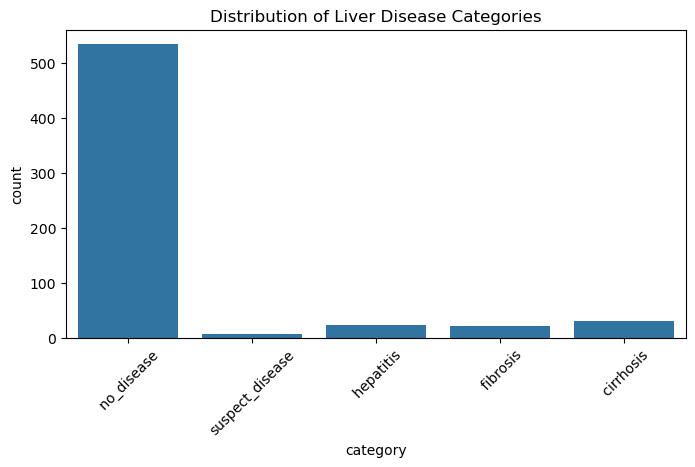

In [10]:
# Target Variable Distribution
plt.figure(figsize=(8,4))
sns.countplot(x='category', data=df)
plt.title("Distribution of Liver Disease Categories")
plt.xticks(rotation=45)
plt.show()

* Class imbalance clearly
* “No disease” dominate
* Fibrosis & cirrhosis have fewer samples

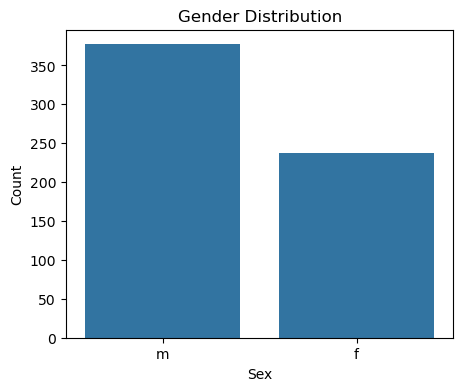

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

* Male patients are more frequent

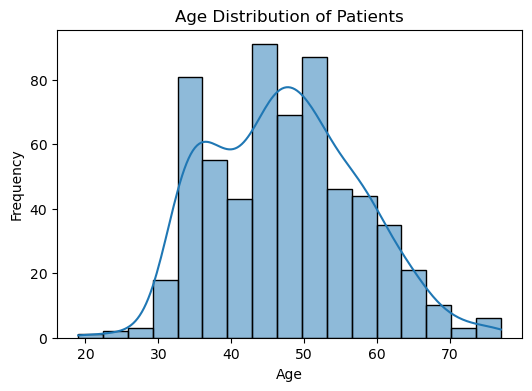

In [12]:
# Visualization for skewness
# Plot histograms for numerical features
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

* Majority of patients fall between 30–50 years

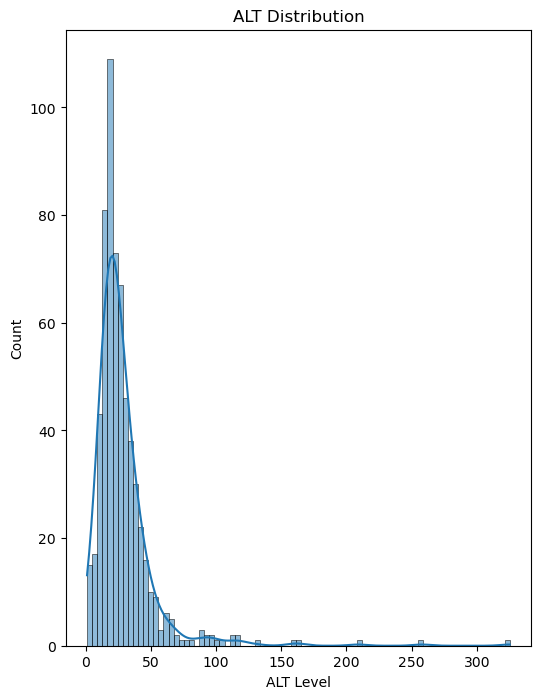

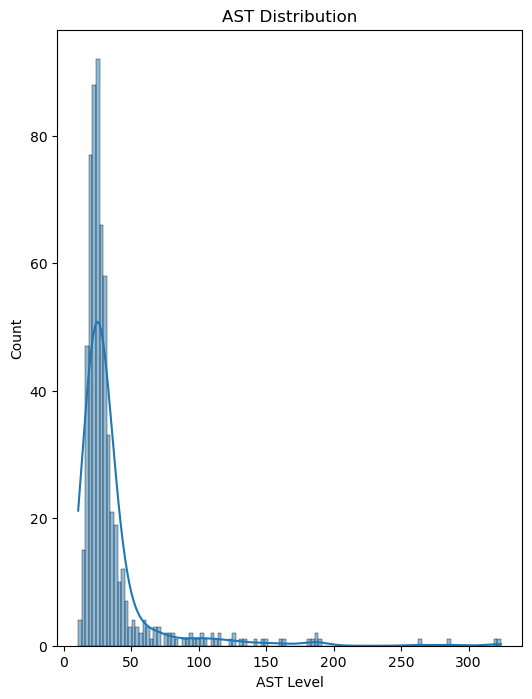

* Most biochemical features are right-skewed.
* Extreme values present (typical for liver disease severity)


In [13]:
# Distribution of Key Liver Enzymes
# 1. ALT (Alanine Aminotransferase)
plt.figure(figsize=(6,8))
sns.histplot(df['alanine_aminotransferase'], kde=True)
plt.title("ALT Distribution")
plt.xlabel("ALT Level")
plt.show()
# 2. AST (Aspartate Aminotransferase)
plt.figure(figsize=(6,8))
sns.histplot(df['aspartate_aminotransferase'], kde=True)
plt.title("AST Distribution")
plt.xlabel("AST Level")
plt.show()
print("* Most biochemical features are right-skewed.\n* Extreme values present (typical for liver disease severity)")

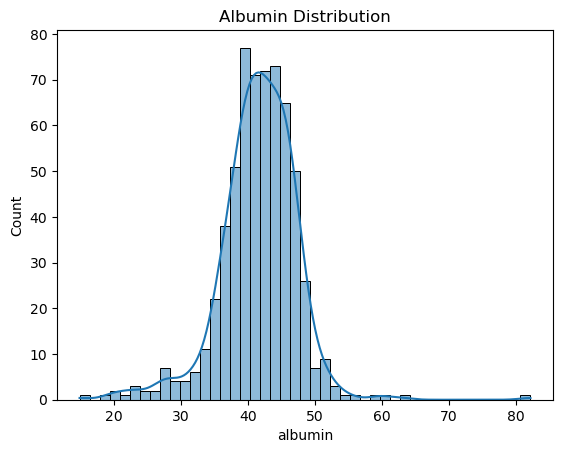

Low albumin values indicate advanced liver dysfunction.


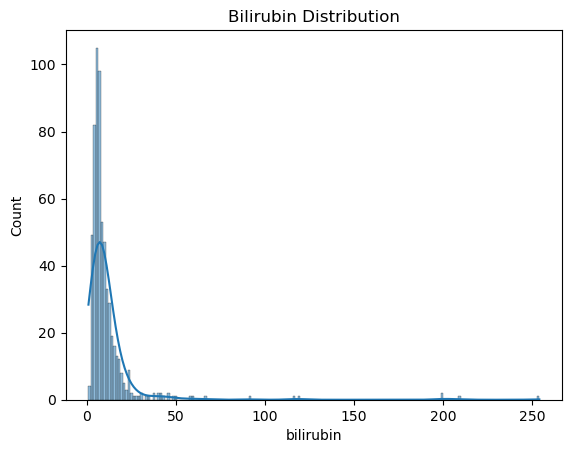

High bilirubin levels are strong indicators of liver damage.


In [14]:
# Univariate Analysis of Medical Features
# 1. Albumin
sns.histplot(df['albumin'], kde=True)
plt.title("Albumin Distribution")
plt.show()
print('Low albumin values indicate advanced liver dysfunction.')

# Bilirubin
sns.histplot(df['bilirubin'], kde=True)
plt.title("Bilirubin Distribution")
plt.show()
print('High bilirubin levels are strong indicators of liver damage.')

In [15]:
# Lets seperate numerical and categorical columns.
num_cols=df.select_dtypes(include=['int64','float64','number']).columns
cat_cols=df.select_dtypes(exclude=['int64','float64']).columns
print('* Numerical columns are :',num_cols,'\n* Categorical columns are:',cat_cols)

* Numerical columns are : Index(['age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase',
       'aspartate_aminotransferase', 'bilirubin', 'cholinesterase',
       'cholesterol', 'creatinina', 'gamma_glutamyl_transferase '],
      dtype='object') 
* Categorical columns are: Index(['category', 'sex', 'protein   '], dtype='object')


In [16]:
# List of numerical columns with missing values
import warnings
warnings.filterwarnings('ignore')
num_missing_cols = [
    'cholesterol',
    'albumin',
    'alkaline_phosphatase',
    'alanine_aminotransferase'
]

# Median imputation
for col in num_missing_cols:
    df[col].fillna(df[col].median(), inplace=True)
print("* Median is used to fill median.")
print("\n Medical data is skewed.\n Mean is sensitive to outliers.\n Median preserves robustness")


* Median is used to fill median.

 Medical data is skewed.
 Mean is sensitive to outliers.
 Median preserves robustness


In [17]:
df.isnull().sum()     # After filling missing values

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

* No missing values found

In [18]:
# Encode categorical columns to numerical, we have sex,category and protein under categorical columns.
# Encode sex Column (Binary Encoding)
df['sex'] = df['sex'].map({'m': 1, 'f': 0})

In [19]:
# Encode Target Variable category (Label Encoding)
from sklearn.preprocessing import LabelEncoder,RobustScaler

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [20]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
# Convert protein column to numeric
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')

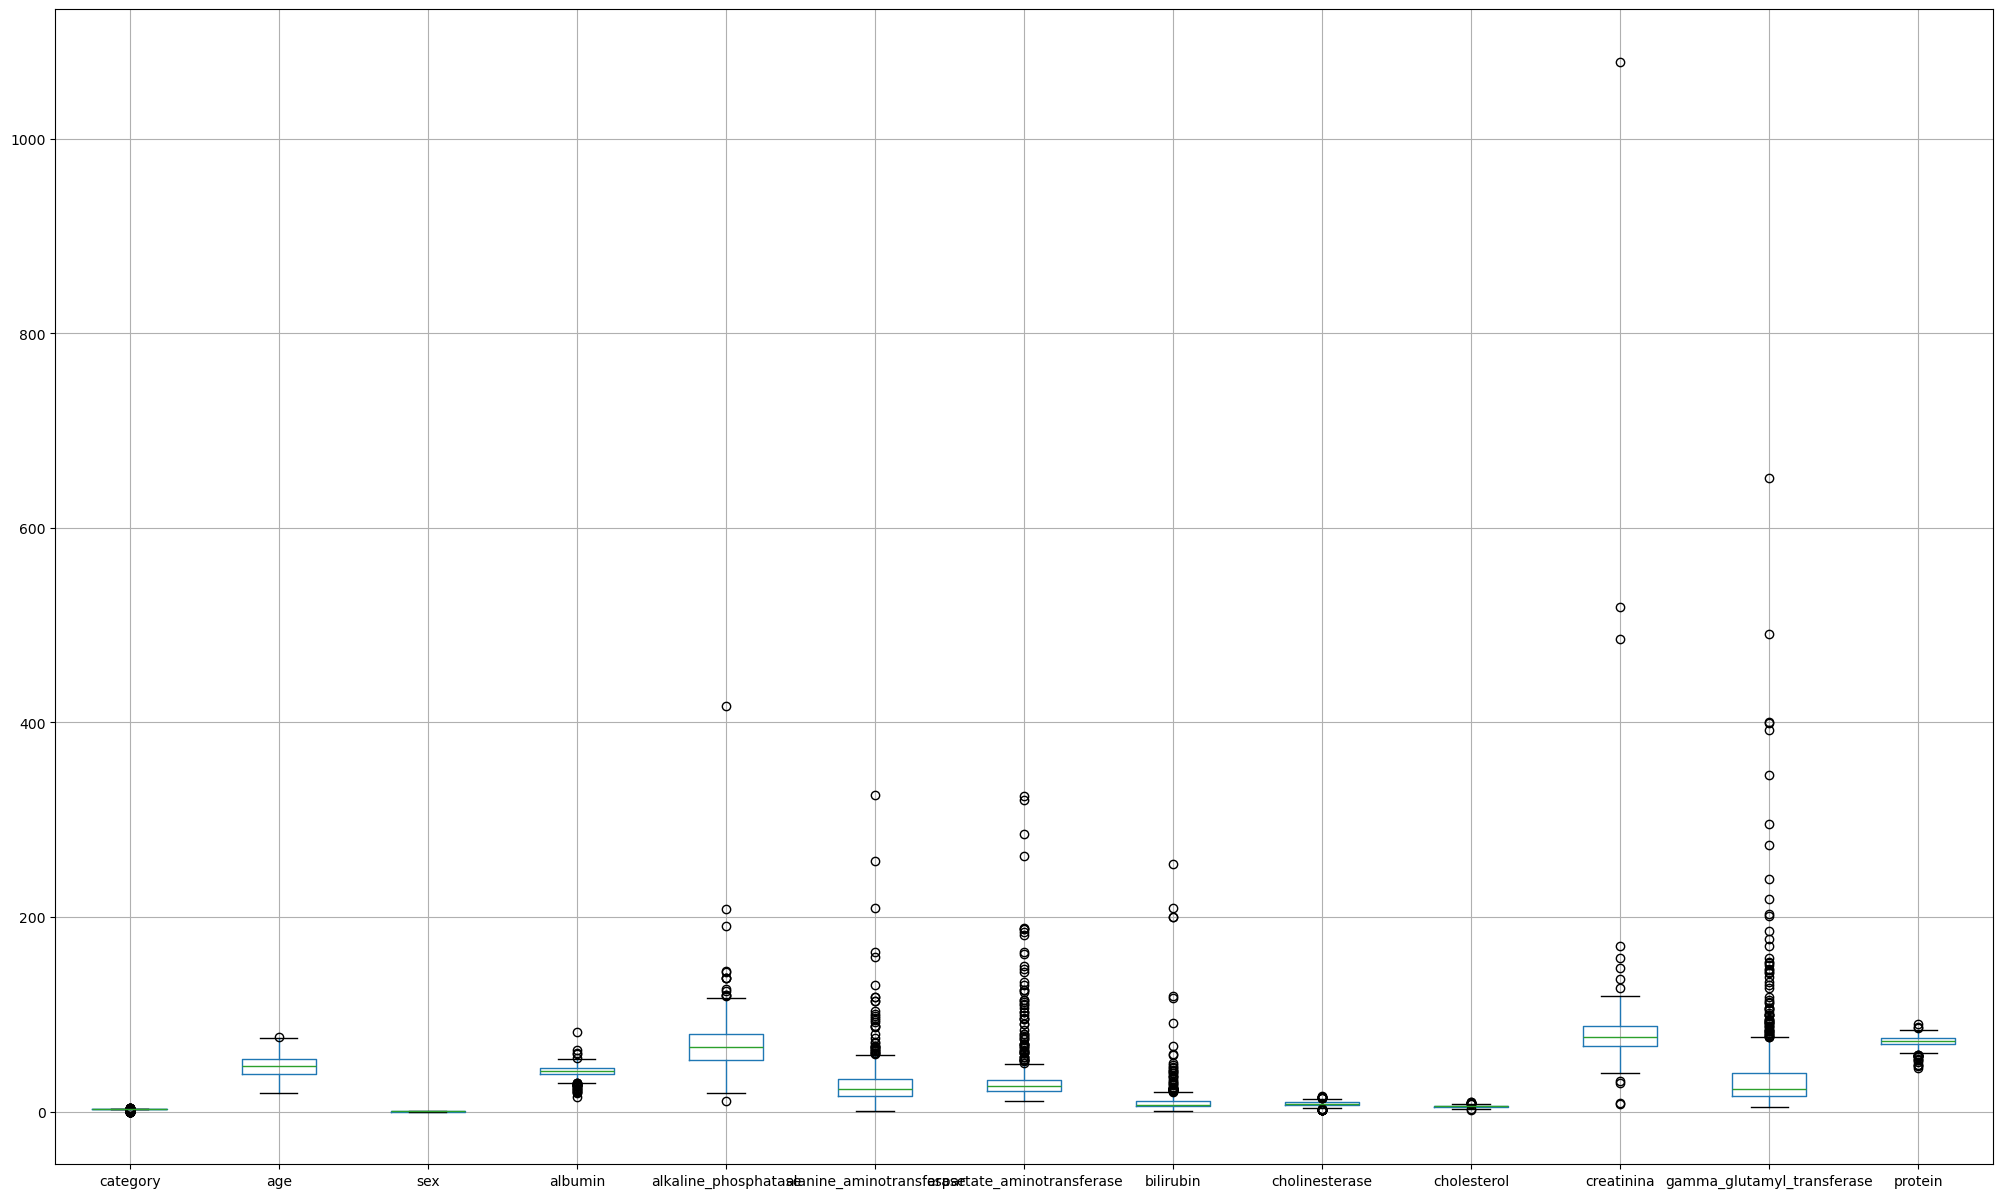

In [21]:
# Check for Outliers using Boxplot
plt.figure(figsize=(25,15))
df.boxplot()
plt.show()

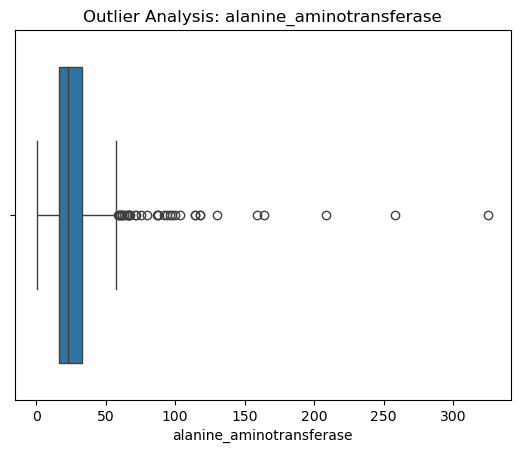

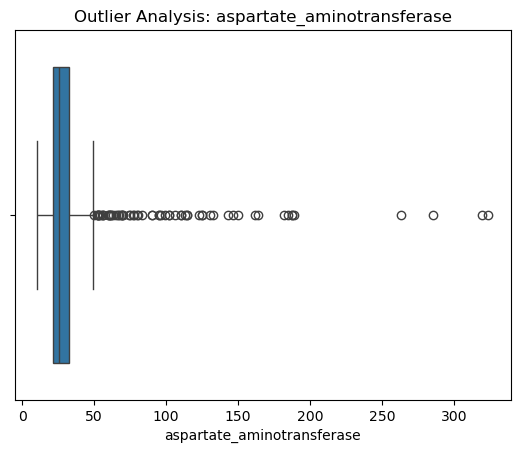

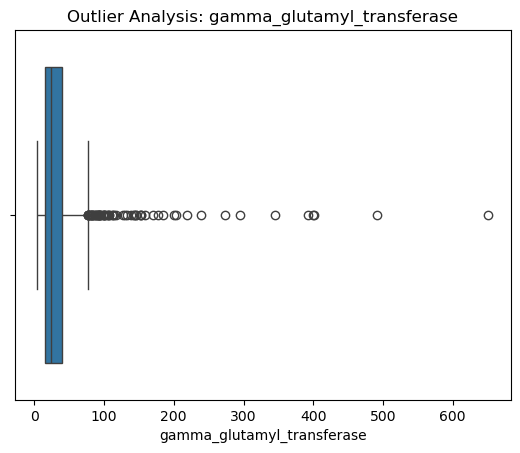

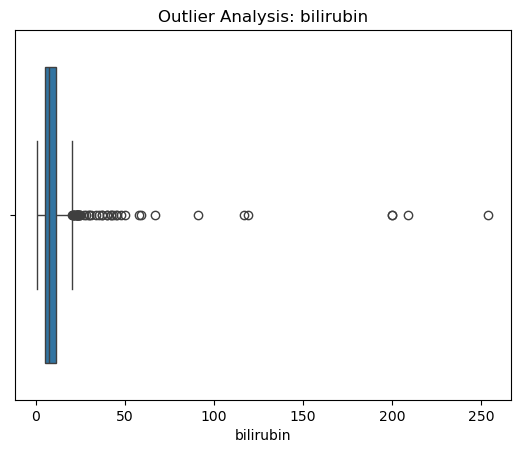

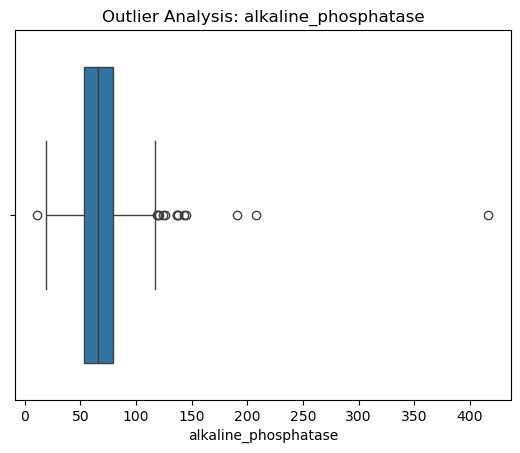


 *Outliers retained.They represent severe liver disease cases.Removing them would remove clinical meaning


In [22]:
# Boxplots ONLY for critical features
important_cols = [
    'alanine_aminotransferase',
    'aspartate_aminotransferase',
    'gamma_glutamyl_transferase',
    'bilirubin',
    'alkaline_phosphatase'
]

for col in important_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Analysis: {col}")
    plt.show()
print("\n *Outliers retained.They represent severe liver disease cases.Removing them would remove clinical meaning")

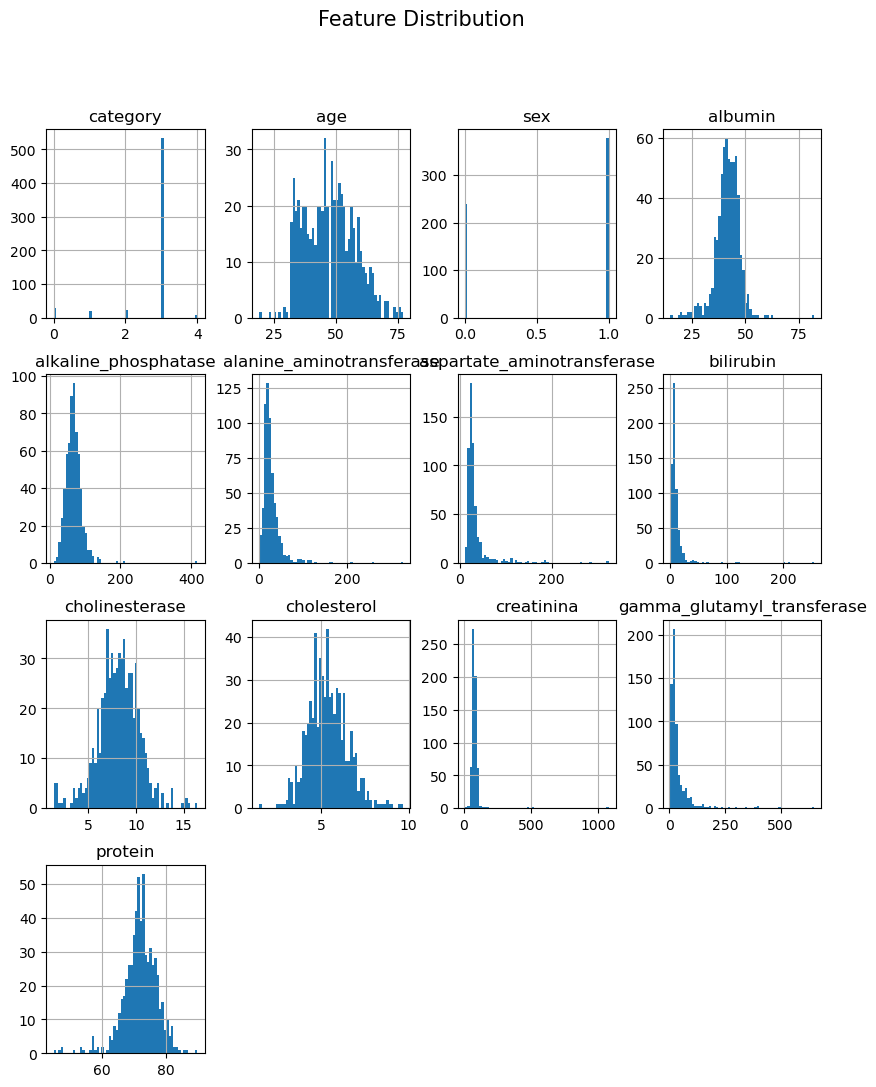

In [23]:
df.hist(figsize=(10,12),bins=60)
plt.suptitle('Feature Distribution',fontsize=15)
plt.show()

<Figure size 1000x1300 with 0 Axes>

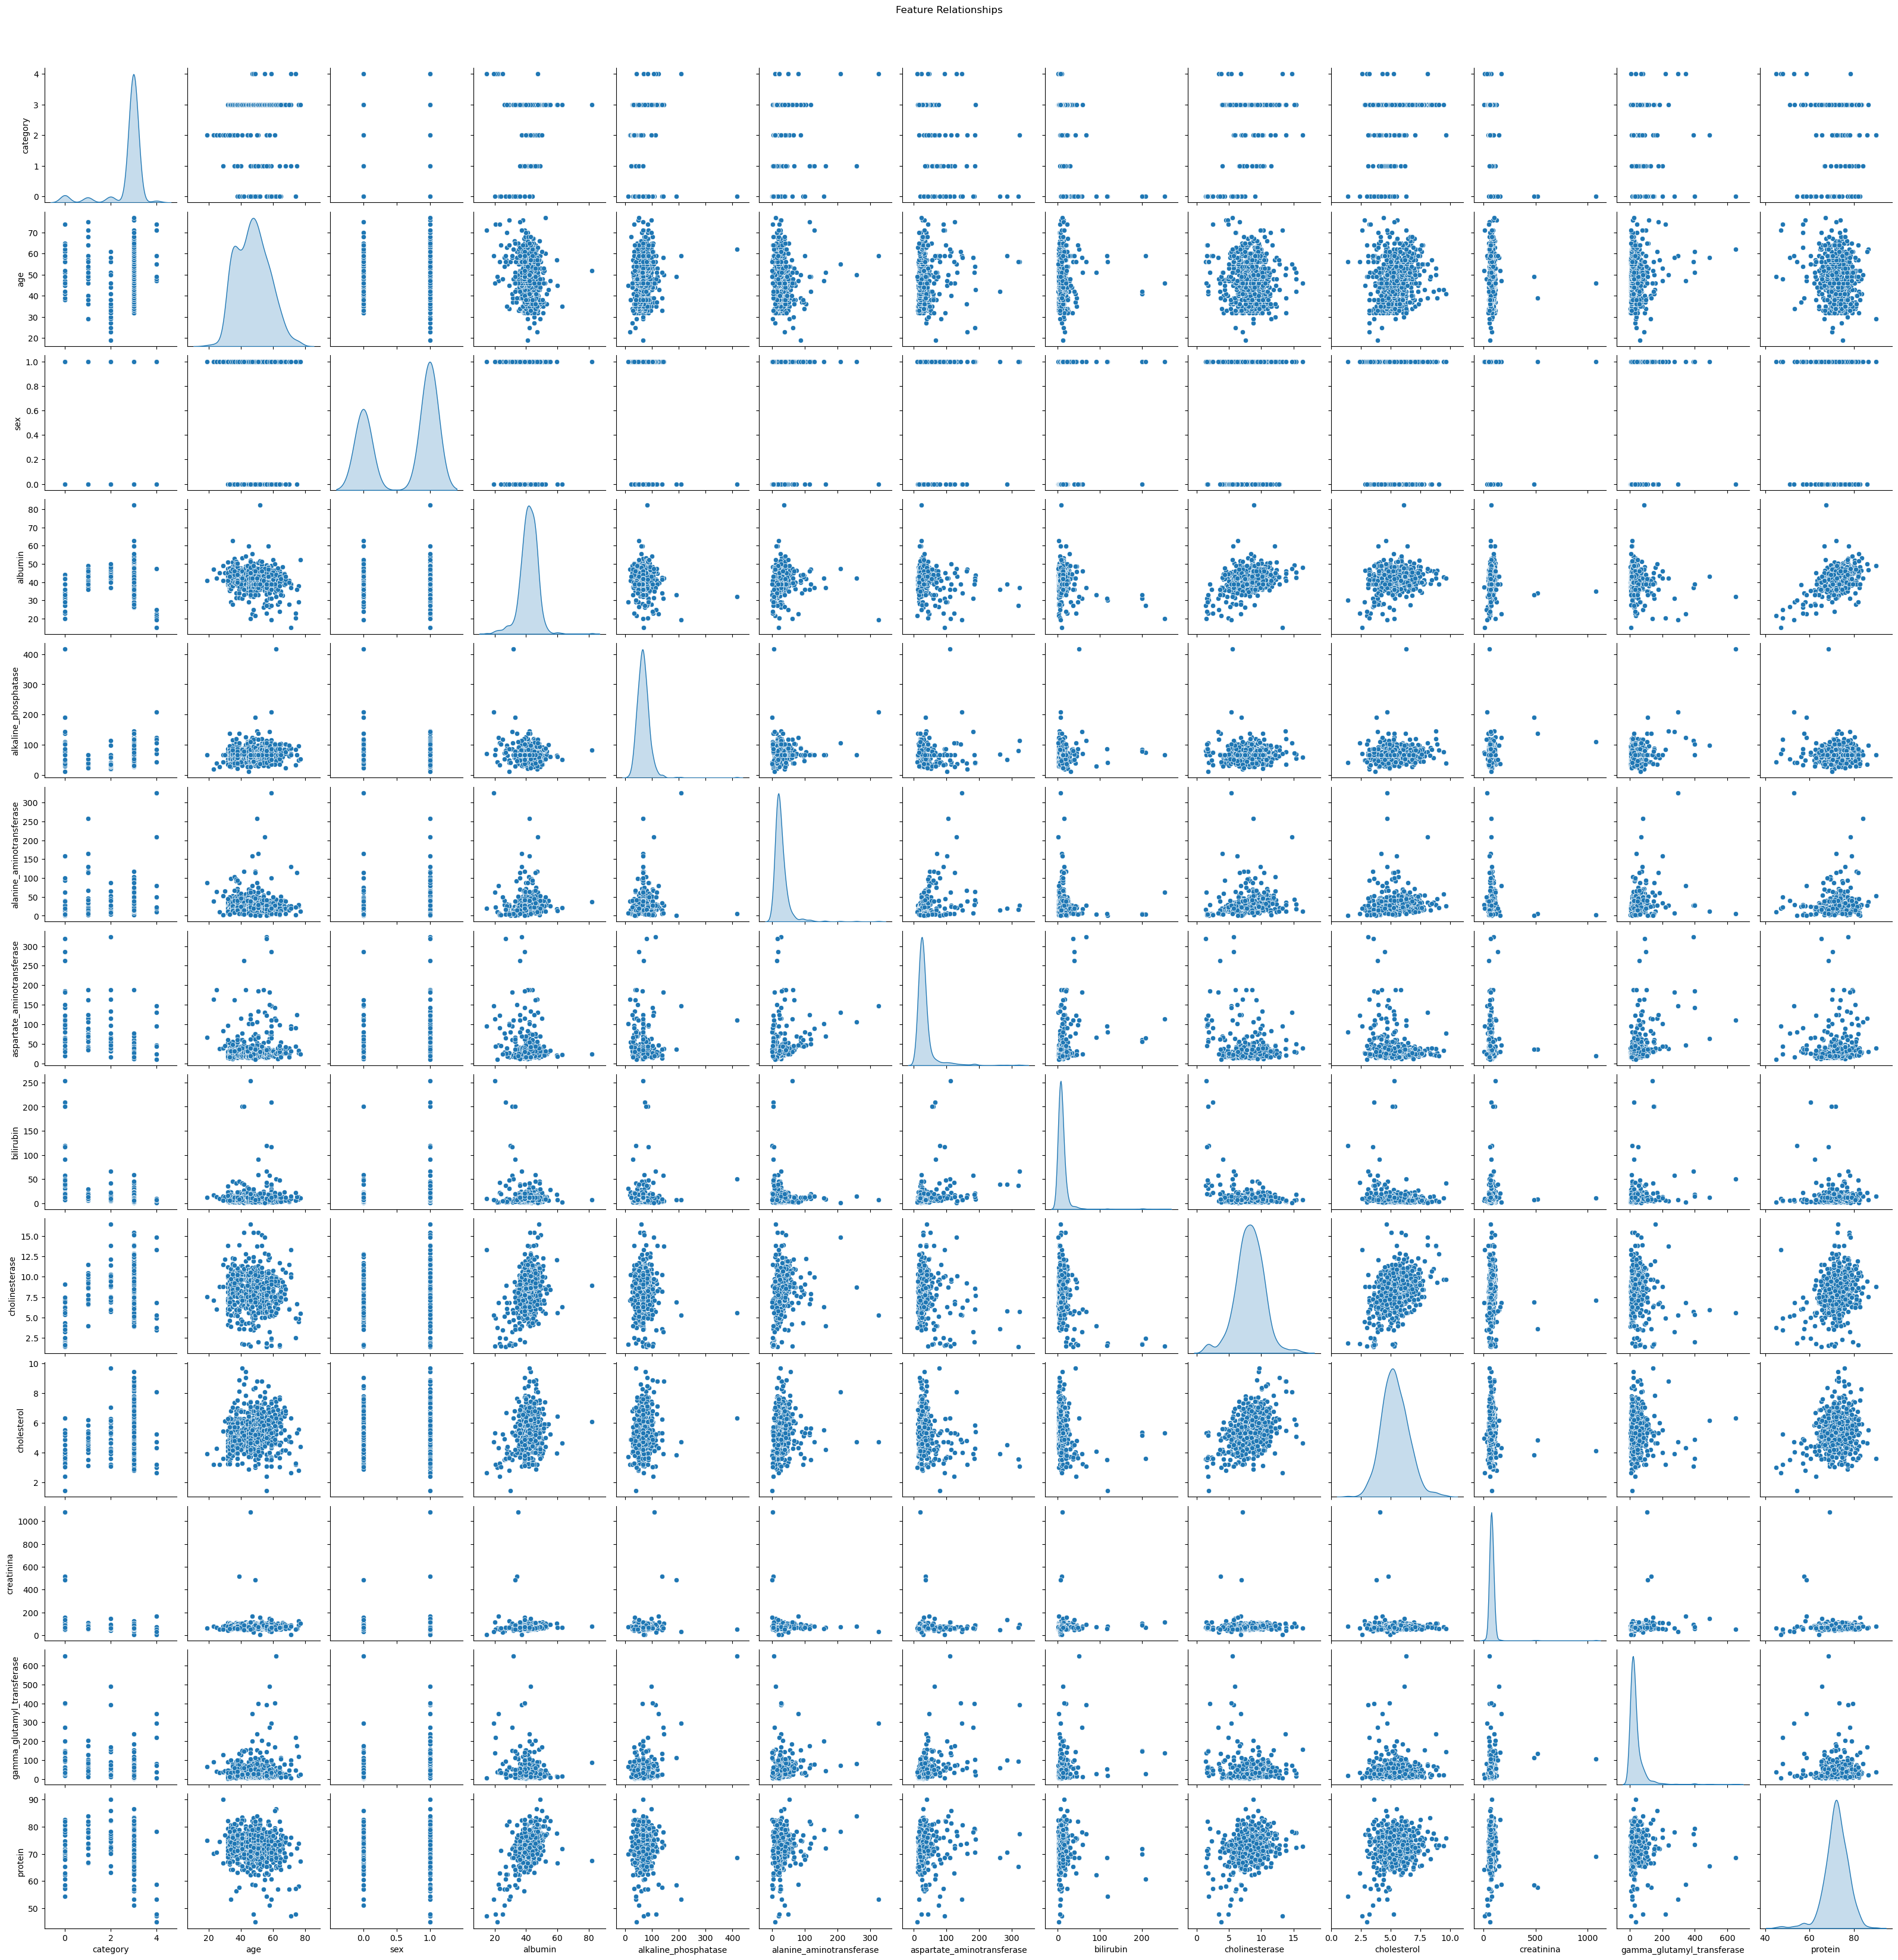

In [24]:
# Pairplots
plt.figure(figsize=(10,13))
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

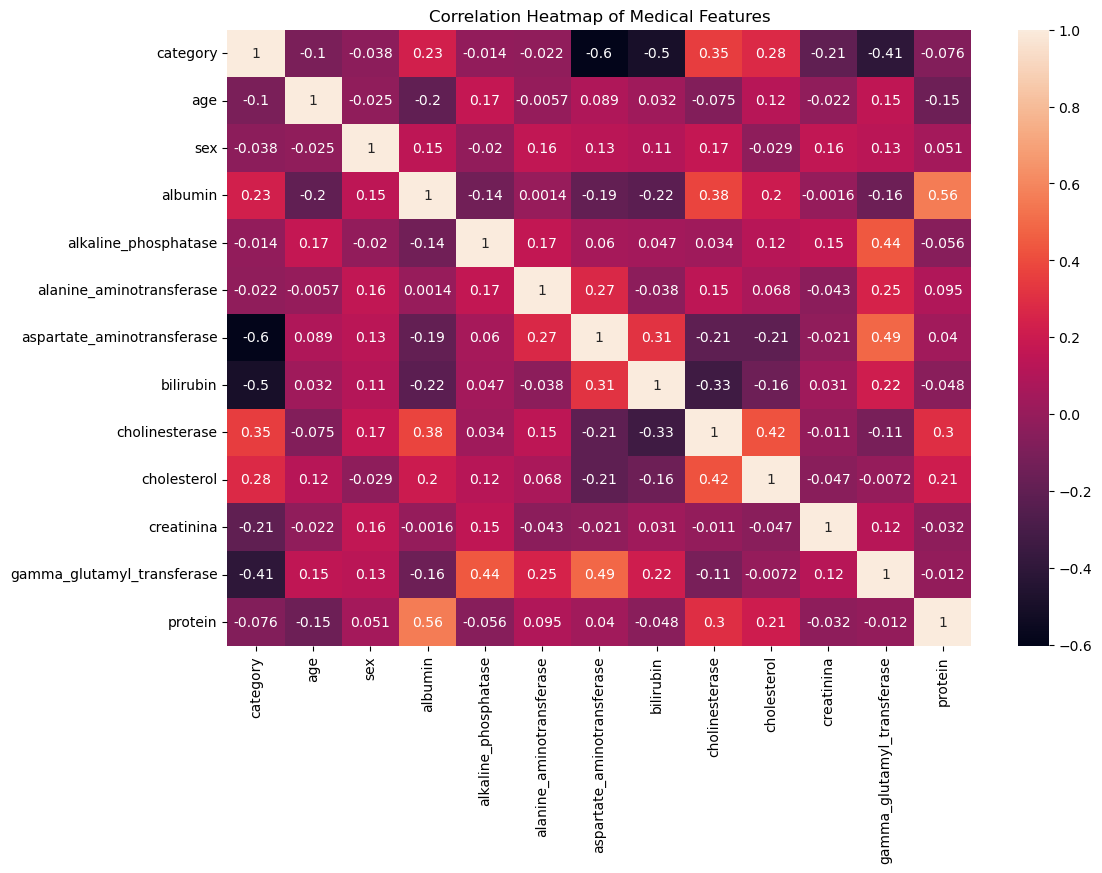

ALT & AST are strongly correlated.
GGT correlates with alkaline phosphatase.
Albumin correlates with protein


In [25]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Medical Features")
plt.show()
print('ALT & AST are strongly correlated.\nGGT correlates with alkaline phosphatase.\nAlbumin correlates with protein')

In [26]:
# Feature- Selection (Split the dataset into target and features column)
X = df.drop('category', axis=1)  # features
y = df['category'] # Target


In [27]:
# Stratified Train–Test Split (Class Imbalance Handling)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(430, 12)
(185, 12)
(430,)
(185,)


# Model Building`

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,auc,recall_score,roc_auc_score,f1_score,classification_report,confusion_matrix,roc_curve

In [29]:
# Baseline Model-Logistic Regression
lr_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [30]:
# Evaluating Matrix
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("The Classification report of the Logistic Regression model is:\n",classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9027027027027027
The Classification report of the Logistic Regression model is:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.11      0.17      0.13         6
           2       0.50      0.43      0.46         7
           3       0.99      0.96      0.97       161
           4       0.50      1.00      0.67         2

    accuracy                           0.90       185
   macro avg       0.55      0.64      0.58       185
weighted avg       0.92      0.90      0.91       185



In [31]:
# Support Vector Machine Model (SVM) (Comparison model)
svm_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', SVC(
        kernel='rbf',
        class_weight='balanced',
        probability=True
    ))
])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [32]:
# Evaluating Matrix
print("SVM Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("The Classification report of the SVM model is:\n",classification_report(y_test, y_pred_lr))


SVM Accuracy: 0.9027027027027027
The Classification report of the SVM model is:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.11      0.17      0.13         6
           2       0.50      0.43      0.46         7
           3       0.99      0.96      0.97       161
           4       0.50      1.00      0.67         2

    accuracy                           0.90       185
   macro avg       0.55      0.64      0.58       185
weighted avg       0.92      0.90      0.91       185



In [33]:
# Log transformation for skewed features
skewed_cols = [
    'alanine_aminotransferase',
    'aspartate_aminotransferase',
    'gamma_glutamyl_transferase',
    'bilirubin',
    'alkaline_phosphatase'
]

for col in skewed_cols:
    df[col] = np.log1p(df[col])

In [34]:
# Scaling 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

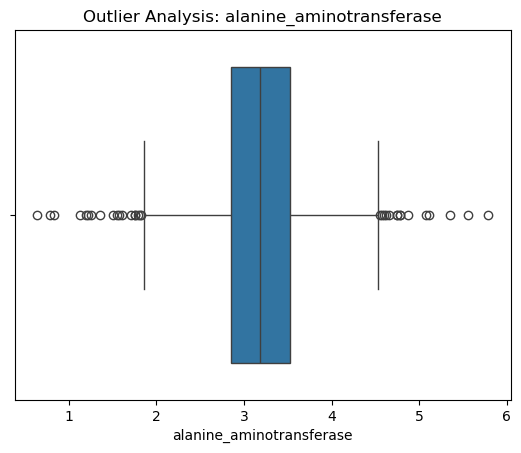

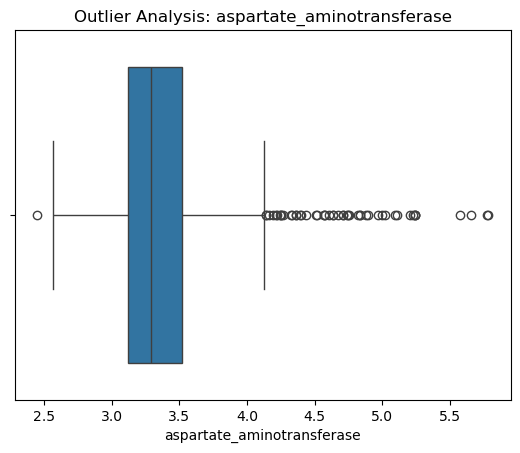

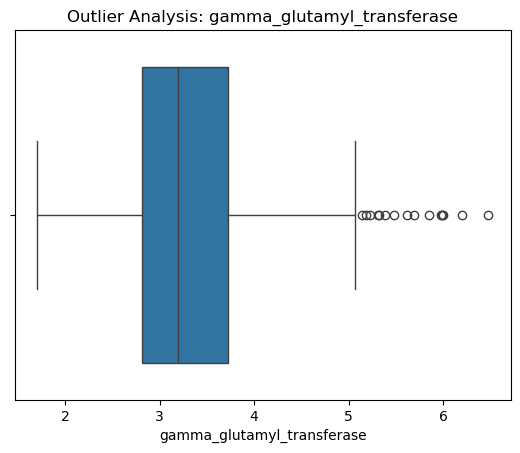

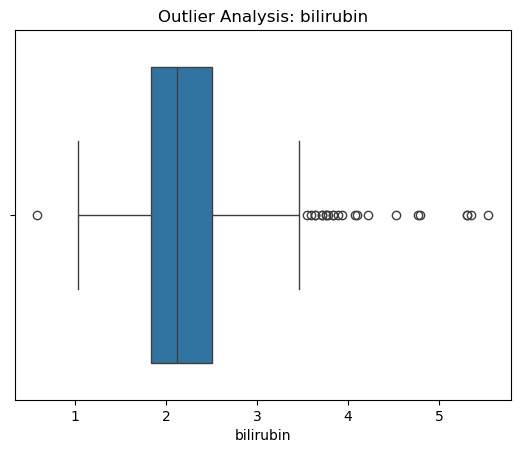

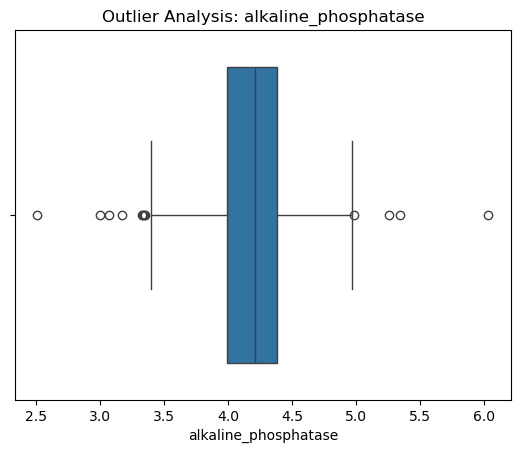

In [35]:
# boxplots ONLY for critical features
important_cols = [
    'alanine_aminotransferase',
    'aspartate_aminotransferase',
    'gamma_glutamyl_transferase',
    'bilirubin',
    'alkaline_phosphatase'
]

for col in important_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Analysis: {col}")
    plt.show()

* Step 1: Log Transformation.
1. Applied log1p() on highly skewed biochemical features to:
2. Compress extreme values
3. Reduce skewness
4. Preserve patient records

* Step 2: Robust Scaling

Used RobustScaler:
1. Uses median & IQR
2. Reduces the influence of outliers
3. Makes features comparable in scale

 - Outliers still appear visually,But their impact on the model is controlled

In [36]:
# Model initialisation
model = RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')

* Why Random Forest?
1. Handles non-linear relationships
2. Robust to outliers
3. Handles class imbalance well
4. Best for medical tabular data

In [37]:
# Model Training
model.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
# Model Prediction
y_pred_rf = model.predict(X_test_scaled)
y_pred_rf

array([3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [39]:
# Model Probabilities (Probs need for ROC)
y_probs = model.predict_proba(X_test_scaled)
y_probs

array([[0.01 , 0.01 , 0.005, 0.975, 0.   ],
       [0.015, 0.   , 0.   , 0.985, 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.015, 0.41 , 0.025, 0.55 , 0.   ],
       [0.005, 0.04 , 0.07 , 0.885, 0.   ],
       [0.02 , 0.015, 0.02 , 0.945, 0.   ],
       [0.   , 0.03 , 0.505, 0.465, 0.   ],
       [0.02 , 0.005, 0.   , 0.975, 0.   ],
       [0.01 , 0.035, 0.065, 0.89 , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.005, 0.   , 0.995, 0.   ],
       [0.   , 0.005, 0.005, 0.99 , 0.   ],
       [0.02 , 0.235, 0.01 , 0.725, 0.01 ],
       [0.945, 0.   , 0.005, 0.05 , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.005, 0.   , 0.995, 0.   ],
       [0.   , 0.01 , 0.015, 0.975, 0.   ],
       [0.   , 0.005, 0.01 , 0.985, 0.   ],
       [0.   , 0.015, 0.   , 0.985, 0.   ],
       [0.01 , 0.   , 0.005, 0.985, 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.035, 0.04 , 0.035, 0.89 , 0.   ],
       [0.005, 0.035, 0.005, 0.9

In [40]:
# Evaluate the performance using evaluating metrics

# 1. Accuracy score
accuracy=accuracy_score(y_test,y_pred_rf)
print('1. Accuracy score = ',accuracy)
#2. Precision
pre=precision_score(y_test,y_pred_rf,average='macro')
print('2. Precision(macro) =',pre)
#3. Recall
rec=recall_score(y_test,y_pred_rf,average='weighted')
print('3. Recall(weighted) =',rec)
#4. F-1 Score
F1score=f1_score(y_test,y_pred_rf,average='macro')
print('4. F1 Score(macro) =',F1score)
print("5. ROC-AUC:", roc_auc_score(y_test, y_probs,multi_class='ovr',average='macro'))

1. Accuracy score =  0.918918918918919
2. Precision(macro) = 0.5738759689922481
3. Recall(weighted) = 0.918918918918919
4. F1 Score(macro) = 0.4802620802620803
5. ROC-AUC: 0.9818909269005541


In [41]:
# Classification report
print('The classification report of the model is\n:',classification_report(y_test,y_pred_rf))

The classification report of the model is
:               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.60      0.50      0.55         6
           2       0.50      0.14      0.22         7
           3       0.94      1.00      0.97       161
           4       0.00      0.00      0.00         2

    accuracy                           0.92       185
   macro avg       0.57      0.44      0.48       185
weighted avg       0.89      0.92      0.90       185



The confusion matrix : 
 [[  5   2   0   2   0]
 [  1   3   1   1   0]
 [  0   0   1   6   0]
 [  0   0   0 161   0]
 [  0   0   0   2   0]]


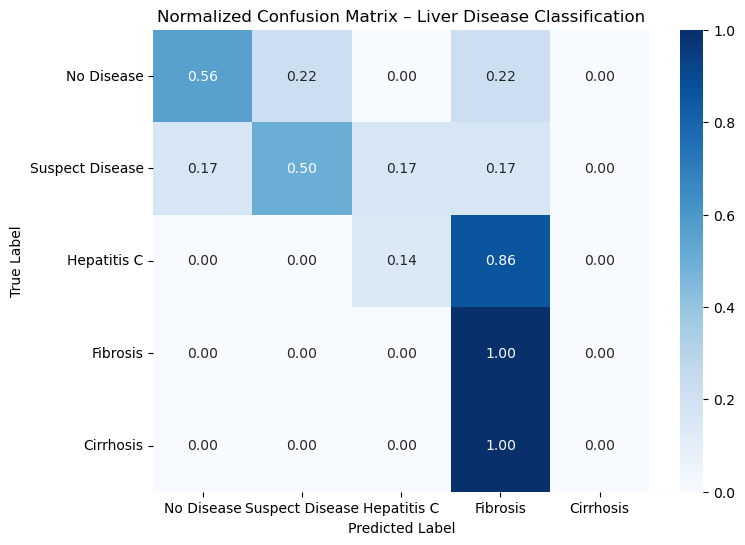

In [42]:
# Confusion matrix
class_names = [
    "No Disease",
    "Suspect Disease",
    "Hepatitis C",
    "Fibrosis",
    "Cirrhosis"
]
print('The confusion matrix : \n',confusion_matrix(y_test, y_pred_rf))
cm_norm = confusion_matrix(y_test, y_pred_rf, normalize='true')
plt.figure(figsize=(8,6))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix – Liver Disease Classification")
plt.show()


 0:No Disease
 1:Suspect Disease
 2:Hepatitis C
 3: Fibrosis
 4:Cirrhosis


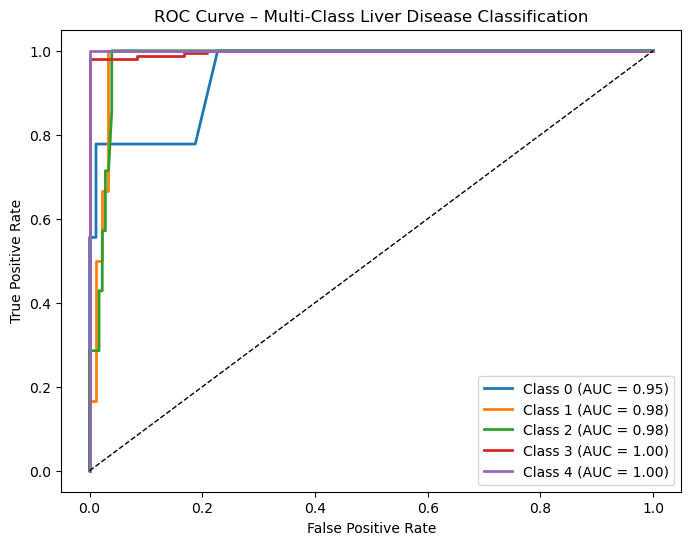

In [43]:
from sklearn.preprocessing import label_binarize
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
print(" 0:No Disease\n","1:Suspect Disease\n","2:Hepatitis C\n","3: Fibrosis\n","4:Cirrhosis")
# ROC CURVE
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2,
             label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Multi-Class Liver Disease Classification")
plt.legend(loc="lower right")
plt.show()


In [44]:
# Stratified Cross Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
cv_scores = cross_val_score(
    rf_cv,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='f1_macro'
)
print("CV F1-macro scores:", cv_scores)
print("Mean F1-macro:", cv_scores.mean())


CV F1-macro scores: [0.57763441 0.47354839 0.66373626 0.52363636 0.53094712]
Mean F1-macro: 0.5539005096116825


Observation:
Liver enzymes (ALT, AST, GGT),Bilirubin,Albumin are the most influential features

In [45]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_g = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=rf_g,
    param_grid=param_grid,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [46]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [47]:
best_rf_model = grid_search.best_estimator_
best_rf_model

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
# Evaluate Tuned Model on Test Data
from sklearn.metrics import classification_report, confusion_matrix

y_pred_best = best_rf_model.predict(X_test_scaled)

print("* The confusion matrix is :\n",confusion_matrix(y_test, y_pred_best))
print("\n * The Classification Report is:\n",classification_report(y_test, y_pred_best))

* The confusion matrix is :
 [[  5   2   0   2   0]
 [  1   3   1   1   0]
 [  0   1   2   4   0]
 [  0   0   0 161   0]
 [  0   0   0   2   0]]

 * The Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.50      0.50      0.50         6
           2       0.67      0.29      0.40         7
           3       0.95      1.00      0.97       161
           4       0.00      0.00      0.00         2

    accuracy                           0.92       185
   macro avg       0.59      0.47      0.51       185
weighted avg       0.91      0.92      0.91       185



In [49]:
# Compare Before vs After Tuning 
# Before tuning
rf_base = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)

print("Base F1-macro:",
      f1_score(y_test, y_pred_base, average='macro'))

print("Tuned F1-macro:",
      f1_score(y_test, y_pred_best, average='macro'))

print("\n * Hyperparameter tuning was performed using GridSearchCV with stratified cross-validation to optimize Random Forest parameters based on macro F1-score, ensuring balanced performance across all liver disease classes to avoid overfitting on the medical dataset.")

Base F1-macro: 0.4802620802620803
Tuned F1-macro: 0.5078952668680765

 * Hyperparameter tuning was performed using GridSearchCV with stratified cross-validation to optimize Random Forest parameters based on macro F1-score, ensuring balanced performance across all liver disease classes to avoid overfitting on the medical dataset.


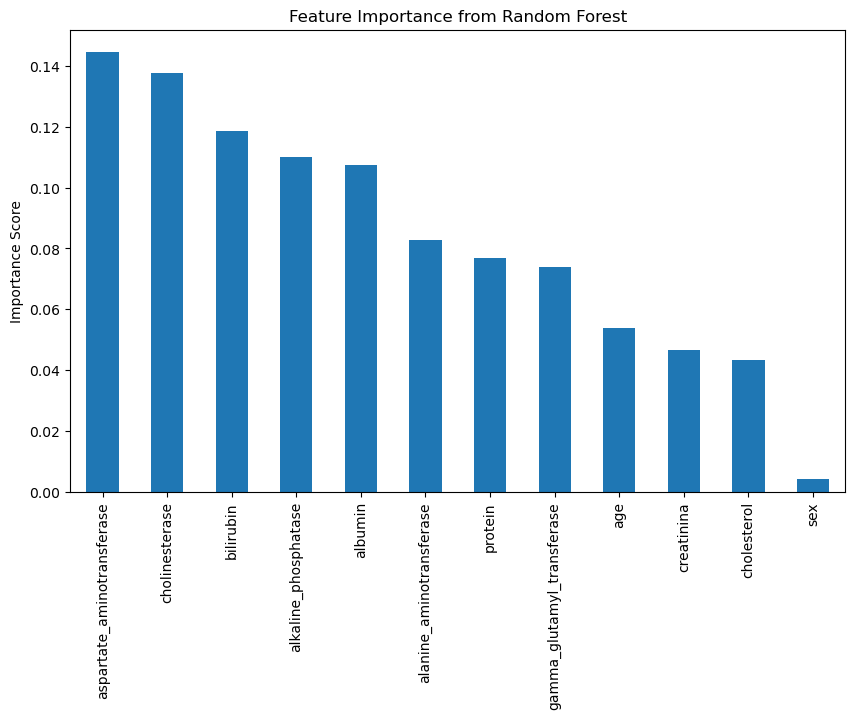

In [50]:
# Feature Importance (Interpretability)
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [56]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))